In [1]:
import pandas as pd
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.4f' % x)
import seaborn as sns
sns.set_context("paper", font_scale=1.3)
sns.set_style('white')
import warnings
warnings.filterwarnings('ignore')
from time import time
import matplotlib.ticker as tkr
from scipy import stats
from statsmodels.tsa.stattools import adfuller
from sklearn import preprocessing
from statsmodels.tsa.stattools import pacf
%matplotlib inline

import math
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.callbacks import EarlyStopping

from keras.layers import LeakyReLU

from statistics import mean
from datetime import date
import datetime
import os
from sklearn.utils import check_array as check_arrays
from math import sqrt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


Using TensorFlow backend.


In [2]:
# Create folder to save results in
identify = 'TimeSeriesCNN-LSTMNorm'
folder_name = '/Users/clausholm/Documents/Python/Master_thesis/Data/test_results/'+identify
#os.mkdir(folder_name)

# Load Dataset
df = pd.read_csv('datasets/Dataset_DailyPlays_DomainFeatures.csv', sep=';', index_col=0, decimal=',')
df = df.drop(columns=['Slope28', 'ArtistPopularity', 'Slope56','FirstWeek','Label 2'])

# Set dataset range
df_range = '160'
df = df.loc[:, :df_range]
df

,1,2,3,4,5,6,7,8,9,10,...,151,152,153,154,155,156,157,158,159,160
Adel Tawil - Unsere Lieder,35,33,61,54,146,165,188,199,212,125,...,33,35,34,45,29,40,47,21,30,33
Alec Benjamin Feat. Alessia Cara - Let Me Down Slowly,2,7,12,13,21,19,15,15,16,13,...,892,807,834,762,830,828,833,841,848,817
Andreas Bourani - Auf uns,1,1,3,3,2,31,27,12,29,56,...,608,601,636,612,608,594,599,634,567,621
Annenmaykantereit - Marie,34,57,84,99,119,128,132,140,126,139,...,31,33,32,29,35,33,28,29,33,30
Ariana Grande - 7 rings,231,272,279,302,325,326,372,311,358,356,...,180,168,173,158,162,173,154,156,146,159
Ava Max - So Am I,82,111,123,97,105,165,308,299,326,304,...,705,756,705,667,734,687,713,757,706,774
Ava Max - Sweet but Psycho,72,158,184,208,188,191,244,204,239,238,...,864,869,919,930,876,896,837,830,844,901
Bausa - Was Du Liebe nennst,1,3,2,4,8,23,47,50,75,84,...,360,306,287,319,329,343,303,313,313,315
C Arma - Yapma - Radio Edit,2,5,2,0,2,5,3,3,2,8,...,1,1,3,1,0,1,1,1,3,1
Calvin Harris & Rag'n'bone Man - Giant,111,128,196,221,307,378,432,529,423,532,...,650,718,679,665,702,655,729,741,688,663


In [3]:
# Define dataset with songs to test on
list_of_test_songs = ['Katy Perry - Never Really Over' , 
              'Taylor Swift - You Need To Calm Down', 
              'Shawn Mendes & Camila Cabello - SeÃ±orita', 
              'Ava Max - So Am I', 
              'Andreas Bourani - Auf uns', 
              'Meduza feat. Goodboys - Piece Of Your Heart', 
              'Pietro Lombardi - Nur Ein Tanz', 
              'Loud Luxury feat. brando - Body', 
              'Mark Forster - Sowieso', 
              'Camila Cabello feat. Young Thug - Havana',  ] 
song_index = 5
df_test = df.loc[list_of_test_songs]
df_test = df_test[song_index:song_index+1]

df_test

,1,2,3,4,5,6,7,8,9,10,...,151,152,153,154,155,156,157,158,159,160
Meduza feat. Goodboys - Piece Of Your Heart,3,0,0,4,1,1,0,10,8,10,...,562,570,689,626,597,653,654,684,703,790


In [4]:
# Define dataset with songs to train on
df_train = df[~df.index.isin(list_of_test_songs)]
df_train

,1,2,3,4,5,6,7,8,9,10,...,151,152,153,154,155,156,157,158,159,160
Adel Tawil - Unsere Lieder,35,33,61,54,146,165,188,199,212,125,...,33,35,34,45,29,40,47,21,30,33
Alec Benjamin Feat. Alessia Cara - Let Me Down Slowly,2,7,12,13,21,19,15,15,16,13,...,892,807,834,762,830,828,833,841,848,817
Annenmaykantereit - Marie,34,57,84,99,119,128,132,140,126,139,...,31,33,32,29,35,33,28,29,33,30
Ariana Grande - 7 rings,231,272,279,302,325,326,372,311,358,356,...,180,168,173,158,162,173,154,156,146,159
Ava Max - Sweet but Psycho,72,158,184,208,188,191,244,204,239,238,...,864,869,919,930,876,896,837,830,844,901
Bausa - Was Du Liebe nennst,1,3,2,4,8,23,47,50,75,84,...,360,306,287,319,329,343,303,313,313,315
C Arma - Yapma - Radio Edit,2,5,2,0,2,5,3,3,2,8,...,1,1,3,1,0,1,1,1,3,1
Calvin Harris & Rag'n'bone Man - Giant,111,128,196,221,307,378,432,529,423,532,...,650,718,679,665,702,655,729,741,688,663
Childish Gambino - This Is America,25,51,46,48,37,49,82,78,80,83,...,34,36,32,37,45,46,47,49,47,47
Chris Brown - Undecided,41,68,75,108,111,103,98,111,120,136,...,24,21,40,35,41,35,40,40,31,28


In [5]:
# Split train dataset into input and output days. Change value of input_days
n_steps_in = 56
number_of_total_days = 140
n_steps_out = number_of_total_days - n_steps_in


# define the train data input and output
train_input_data = df_train.iloc[:, 0:n_steps_in]
train_output_data = df_train.iloc[:, n_steps_in:number_of_total_days]

# Set X and y to train input and output data
train_input = array(train_input_data)
train_output = array(train_output_data)

# create scaler
x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()
#x_scaler = StandardScaler()
#y_scaler = StandardScaler()
# fit scaler on data
train_input = x_scaler.fit_transform(train_input)
train_output = y_scaler.fit_transform(train_output)


print("Input days: ", len(train_input[0])) 
print("Output days: ", len(train_output[0]))
print("Example of first song input data: ", train_input[0])
print("Example of first song output data: ", train_output[0])


Input days:  56
Output days:  84
Example of first song input data:  [0.06415094 0.04551724 0.08047493 0.06569343 0.16609784 0.16802444
 0.20682068 0.24659232 0.22529224 0.12899897 0.21546392 0.15384615
 0.20223577 0.28       0.22105263 0.28286015 0.27953586 0.32606325
 0.3012884  0.22156863 0.25652174 0.23733863 0.26130199 0.23396567
 0.1776824  0.18648208 0.24599832 0.1875     0.23318777 0.23032787
 0.22742475 0.19167389 0.2393968  0.14117647 0.14876033 0.17612688
 0.22922135 0.23240589 0.17166667 0.16450567 0.15553677 0.12048193
 0.10428016 0.12999217 0.13371151 0.13974895 0.13349321 0.1123506
 0.15303644 0.17455392 0.10380349 0.1541411  0.14463453 0.12555721
 0.12441315 0.20654716]
Example of first song output data:  [0.14834337 0.14383043 0.15789474 0.16271722 0.16958599 0.16905901
 0.21131186 0.18368963 0.25161812 0.18892508 0.1674277  0.23014587
 0.18779715 0.11195735 0.06338553 0.06571655 0.05942948 0.08715596
 0.08273667 0.08034321 0.19014627 0.1983346  0.23909657 0.19450801
 0

In [6]:
# Split test dataset into input and output days.

# define the test data input and output
test_input_data = df_test.iloc[:, 0:n_steps_in]
test_output_data = df_test.iloc[:, n_steps_in:number_of_total_days]

# Set X and y to train input and output data
test_input = array(test_input_data)
test_output = array(test_output_data)

# transform data
test_input = x_scaler.transform(test_input)

print("Input days: ", len(test_input[0])) 
print("Output days: ", len(test_output[0]))
print("Example of first song input data: ", test_input[0])
print("Example of first song output data: ", test_output[0])

Input days:  56
Output days:  84
Example of first song input data:  [0.00377358 0.         0.         0.00486618 0.00113766 0.00101833
 0.         0.01239157 0.00850159 0.01031992 0.00824742 0.01053741
 0.0101626  0.01333333 0.00842105 0.00736067 0.00843882 0.00981461
 0.00891972 0.01078431 0.00978261 0.01588878 0.00723327 0.00813008
 0.01030043 0.01221498 0.01937658 0.01948052 0.02270742 0.03196721
 0.03929766 0.04423244 0.04901037 0.04789916 0.04214876 0.0442404
 0.0463692  0.04746318 0.0375     0.0356564  0.0498732  0.04337349
 0.0459144  0.05090055 0.07779579 0.07615063 0.07434053 0.07729084
 0.08178138 0.07292475 0.06180666 0.05368098 0.06065319 0.05052006
 0.06338028 0.05923617]
Example of first song output data:  [ 78 100  79  71  70  76 127 100 104 117  99 115 161 124 141 136 131 137
 131 179 137 148 166 158 153 161 201 161 170 161 216 177 184 199 231 193
 197 218 205 219 241 260 205 203 251 240 238 281 275 264 262 249 268 294
 332 302 292 316 317 317 340 419 368 356 354 377 37

In [7]:

# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1

# define model
# CNN LSTM Model

# Lenght of sub-sequence
n_seq = 7

# Number of sub-sequences
n_steps = 8

# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
train_input = train_input.reshape((train_input.shape[0], n_seq, n_steps, n_features))
test_input = test_input.reshape((1, n_seq, n_steps, n_features))

model = Sequential()
model.add(TimeDistributed(Conv1D(filters=55, kernel_size=2), input_shape=(None, n_steps, n_features)))
model.add(LeakyReLU(alpha=0.1))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(50))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(n_steps_out))
model.compile(optimizer='adam', loss='mse')

history = model.fit(train_input, train_output, epochs=10000, batch_size=9, validation_data=(test_input, test_output), 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=1, shuffle=False)

yhat = history

model.summary()


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 86 samples, validate on 1 samples
Epoch 1/10000
86/86 [==============================] - 1s 6ms/step - loss: 0.1573 - val_loss: 91500.8125
Epoch 2/10000
86/86 [==============================] - 0s 615us/step - loss: 0.1278 - val_loss: 91470.0234
Epoch 3/10000
86/86 [==============================] - 0s 605us/step - loss: 0.0900 - val_loss: 91429.7266
Epoch 4/10000
86/86 [==============================] - 0s 603us/step - loss: 0.0630 - val_loss: 91450.0078
Epoch 5/10000
86/86 [==============================] - 0s 616us/step - loss: 0.0473 - val_loss: 91456.9375
Epoch 6/10000
86/86 [==============================] - 0s 600us/step - loss: 0.0396 - val_loss: 91463.6016
Epoch 7/10000
86/86 [==============================] - 0s 614us/step - loss: 0.0361 - val_loss: 91464.5156
Epoch 8/10000
86/86 [==============================] - 0s 601us/step - loss: 0.0342 - val_

In [8]:
# demonstrate prediction
yhat = model.predict(test_input, verbose=0)
print("predicticted time series output: ", yhat)

# transform data back to original scale
yhat = y_scaler.inverse_transform(yhat)

# Define the first expected and predicted
expected = test_output[0]
predictions = yhat[0]
print("Expected time series output: ", expected)
print("Predicted time series output: ", predictions)

predicticted time series output:  [[0.06842971 0.06629502 0.08240696 0.07458311 0.08440227 0.06416687
  0.04498568 0.06471403 0.06633691 0.07660112 0.05606868 0.09315224
  0.09825636 0.08686546 0.08381322 0.07619102 0.09027377 0.11278029
  0.08516103 0.07537207 0.08383065 0.07962497 0.12099199 0.11985561
  0.10548159 0.11834168 0.07339089 0.07882501 0.11665721 0.06340261
  0.10830286 0.12490886 0.11971889 0.11235346 0.09192725 0.07151471
  0.08947224 0.07842266 0.10839586 0.10127804 0.09575103 0.11375622
  0.1373597  0.0845966  0.10903268 0.09906112 0.12504715 0.11356321
  0.08301735 0.11834275 0.08827621 0.09825275 0.10386385 0.10624996
  0.0967556  0.07618354 0.09649737 0.10582058 0.09258217 0.12076749
  0.10947094 0.12152514 0.09328052 0.13706562 0.09059524 0.10619365
  0.09553337 0.10298007 0.10609782 0.10256015 0.12721758 0.09027911
  0.08625749 0.11851415 0.11218938 0.12028728 0.10424371 0.13430892
  0.12526473 0.11610161 0.10030873 0.09948874 0.09534453 0.13068521]]
Expected tim

In [9]:
# Create variable for each song, used to compare predicted and true value
lst1 = [test_output[0], yhat[0]]
#lst2 = [test_output[1], yhat[1]]
#lst3 = [test_output[2], yhat[2]]
#lst4 = [test_output[3], yhat[3]]
#lst5 = [test_output[4], yhat[4]]
#lst6 = [test_output[5], yhat[5]]
#lst7 = [test_output[6], yhat[6]]
#lst8 = [test_output[7], yhat[7]]
#lst9 = [test_output[8], yhat[8]]
#lst10 = [test_output[9], yhat[9]]

# Set value for labelling
daysOrWeeks = 'Days'

# Make dataset of test song variables
df1 = pd.DataFrame(lst1).T
df1.columns = ['True', 'Predicted']
df1[daysOrWeeks] = df1.index + n_steps_in
df1.set_index(daysOrWeeks,inplace=True)


In [10]:
# Forecast Error (or Residual Forecast Error)
forecast_errors = [test_output[i]-yhat[i] for i in range(len(test_output))]  

df_result = pd.DataFrame(columns=['Song', 'Date', 'Bias', 'MAE', 'MAPE', 'MSE', 'RMSE', 'RMSPE', 'Predict_from', 'Predict_to'])

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def root_mean_square_percentage_error(y_true, y_pred):
    loss = np.sqrt(np.mean(np.square(((y_true - y_pred) / y_true)), axis=0)) * 100
    return loss

for i in range(len(test_output)):
    print(list_of_test_songs[i])

    # Mean Forecast Error (or Forecast Bias), Mean Absolute Error, Mean Squared Error, Root Mean Squared Error  
    bias = mean(forecast_errors[i])
    mae = mean(abs(forecast_errors[i]))
    mape = mean_absolute_percentage_error(test_output[i], yhat[i])
    mse = mean_squared_error(test_output[i], yhat[i]) 
    rmse = sqrt(mse)
    rmspe = root_mean_square_percentage_error(test_output[i], yhat[i])
    df_result = df_result.append({'Date': date.today(),'Song': list_of_test_songs[song_index], 'Bias': bias, 'MAE': mae, 'MAPE': mape, 'MSE': mse, 'RMSE': rmse, 'RMSPE': rmspe, 'Predict_from':n_steps_in, 'Predict_to': number_of_total_days}, ignore_index=True)
    
    print('Bias: %f' % bias)
    print('MAE: %f' % mae)
    print('MAPE: %f'% mape)
    print('MSE: %f' % mse)
    print('RMSE: %f' % rmse)
    print('RMSPE %f' % rmspe)
    print('_________________________')

# Create datetime for time of results
now = datetime.datetime.now()
now = str(now.strftime("%Y-%m-%d %H:%M:%S"))

# Save Results to csv file in folder
#df_result.to_csv(folder_name+'/'+identify+'_'+now+'.csv', sep=';', decimal=',' )

df_result


Katy Perry - Never Really Over
Bias: 144.863308
MAE: 147.558356
MAPE: 44.862614
MSE: 39334.759093
RMSE: 198.329925
RMSPE 50.460695
_________________________


,Song,Date,Bias,MAE,MAPE,MSE,RMSE,RMSPE,Predict_from,Predict_to
0,Meduza feat. Goodboys - Piece Of Your Heart,2020-06-06,144.8633,147.5584,44.8626,39334.7591,198.3299,50.4607,56,140


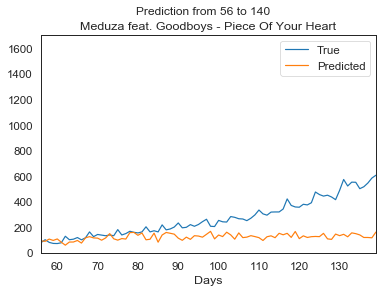

Song:  Meduza feat. Goodboys - Piece Of Your Heart
Prediction from 56 to 140
________________________________________________________________


In [11]:
import matplotlib.pyplot as plt 

pred_title = "Prediction from "+ str(n_steps_in)+" to "+str(number_of_total_days)
fig_size = 1700

df1.plot()
plt.ylim((0,fig_size))
plt.title(list_of_test_songs[song_index])
plt.suptitle(pred_title)
#plt.savefig(folder_name+'/'+list_of_test_songs[song_index]+ '_'+ identify +'.png')
plt.show()
plt.close()
print("Song: ", list_of_test_songs[song_index])
print(pred_title)
print('________________________________________________________________')

